In [2]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [3]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3),
          activation='relu', input_shape=(224, 224, 3)))

model.add(Conv2D(filters=36, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])


In [5]:
def preprocessinImage(path):
    image_data = ImageDataGenerator(
        zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True)
    image = image_data.flow_from_directory(directory=path, target_size=(
        224, 224), batch_size=32, class_mode='binary')
    return image


path = "G:/lung cancer/finalData/train"
train_data = preprocessinImage(path)


def preprocessinImage2(path):
    image_data = ImageDataGenerator(
        rescale=1/255)
    image = image_data.flow_from_directory(directory=path, target_size=(
        224, 224), batch_size=32, class_mode='binary')
    return image


path = "G:/lung cancer/finalData/test"
test_data = preprocessinImage2(path)

path = "G:/lung cancer/finalData/test"
val_data = preprocessinImage2(path)


Found 699 images belonging to 2 classes.
Found 202 images belonging to 2 classes.
Found 202 images belonging to 2 classes.


In [6]:
#early stopping
#es = EarlyStopping(monitor="val_accuracy", min_delta=0.01,
                   #patience=3, verbose=1, mode='auto')
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01,
                    patience=3, verbose=1, mode='auto')
#model check point
mc = ModelCheckpoint(monitor='val_accuracy', filepath='./bestmodel.hdf5',
                     verbose=1, save_best_only=True, mode='auto')
cd = [es, mc]

hs = model.fit(train_data, validation_data= val_data, callbacks=cd)

h = hs.history
h.keys()

22/22 [==============================] - ETA: 0s - loss: 0.6005 - accuracy: 0.7711
Epoch 1: val_accuracy improved from -inf to 0.78218, saving model to .\bestmodel.hdf5
22/22 [==============================] - 35s 2s/step - loss: 0.6005 - accuracy: 0.7711 - val_loss: 0.4332 - val_accuracy: 0.7822


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

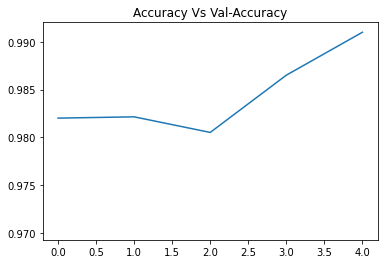

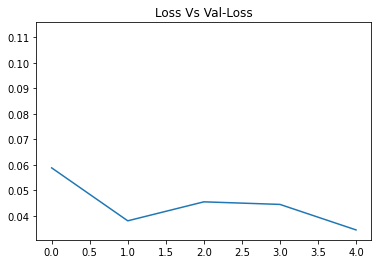

In [21]:
plt. plot(h['accuracy'])
plt.plot(h['val_accuracy'], c='red')
plt.title("Accuracy Vs Val-Accuracy")
plt.show()

plt. plot(h['loss'])
plt.plot(h['val_loss'], c='red')
plt.title("Loss Vs Val-Loss")
plt.show()


In [20]:
from keras.utils import load_img, img_to_array
from keras.models import load_model
model = load_model("G:/re/finalData/bestmodel.hdf5")

acc = model.evaluate_generator(test_data)[1]

print(f"Accuracy of the model is {acc*100} %")

path = 'G:/lung cancer/finalData/test/non-cancerous/normal23.png'
img = load_img(path, target_size=(224, 224))
input_arr = img_to_array(img)
print(input_arr.shape)

plt.imshow(input_arr)
plt.show()
input_arr = np.expand_dims(input_arr, axis= 0)
pred = model.predict_step(input_arr)[0][0]

#
print(pred)

if pred == 0:
    print("cancer")
else:
    print("non_cancer")


ImportError: cannot import name 'load_img' from 'keras.preprocessing.image' (c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\preprocessing\image.py)

In [8]:
train_data.class_indices


{'cancerous': 0, 'non-cancerous': 1}